# Xgboost without spark


In [ ]:
!ls /content

sample_data  UCI_Credit_Card_Undersampled2.csv


In [ ]:
!pip install --upgrade xgboost

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.read_csv("/content/UCI_Credit_Card_Undersampled2.csv")

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,7511,380000.0,2,3,2,31,-1,-1,-1,-1,...,11147.0,12483.0,13680.0,9240.0,15233.0,11202.0,12493.0,13748.0,18061.0,0
1,15326,240000.0,2,2,1,35,-2,-2,-2,-2,...,5638.0,2582.0,4127.0,7375.0,4908.0,5638.0,2587.0,4127.0,4942.0,0
2,18667,50000.0,2,1,2,23,-1,-1,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,7495,330000.0,1,1,2,32,0,0,0,0,...,141453.0,112633.0,121242.0,5500.0,4723.0,5500.0,4000.0,10700.0,4500.0,0
4,1240,80000.0,2,2,1,35,-1,-1,-1,-1,...,396.0,396.0,396.0,9796.0,13443.0,396.0,396.0,0.0,396.0,0


In [ ]:
label_name = "default_payment_next_month"

In [ ]:
X = df.drop(label_name, axis=1)
y = df[label_name]


In [ ]:
import xgboost as xgb


# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# import XGBClassifier
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 0.1,
            'n_estimators':100
        }



# instantiate the classifier
xgb_clf = XGBClassifier(**params)



# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# alternatively view the parameters of the xgb trained model
print(xgb_clf)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)


In [ ]:
y_pred = xgb_clf.predict(X_test)

Accuracy: 0.7702735415153715
XGBoost model accuracy score: 0.7703
Confusion Matrix:
[[2551  235]
 [ 714  631]]
Weighted Precision: 0.7642


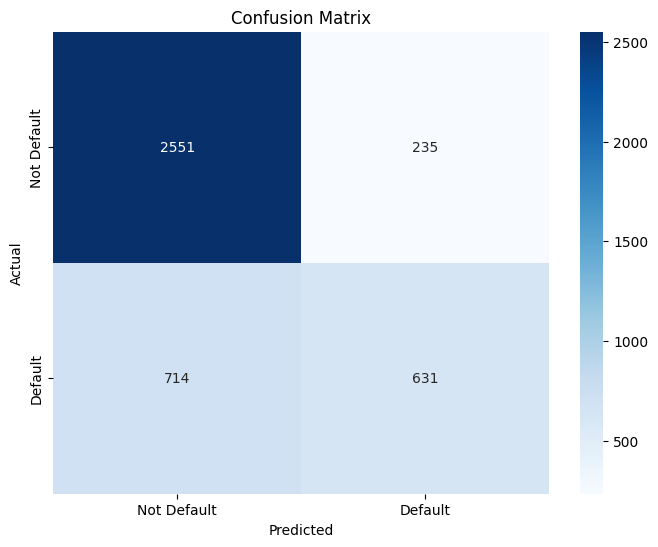

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      2786
           1       0.73      0.47      0.57      1345

    accuracy                           0.77      4131
   macro avg       0.75      0.69      0.71      4131
weighted avg       0.76      0.77      0.75      4131

ROC AUC Score: 0.6924


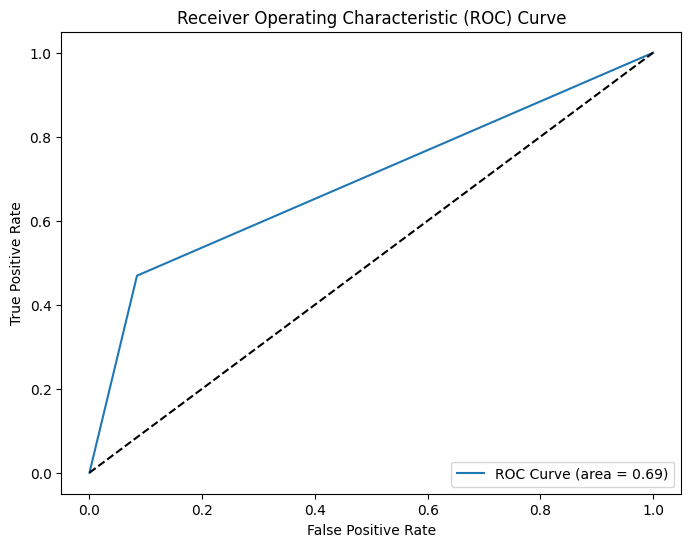

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import seaborn as sns  # Pour une meilleure visualisation de la matrice de confusion

# Supposons que y_test et y_pred soient déjà définis (y_test = vraies étiquettes, y_pred = prédictions du modèle)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print('XGBoost model accuracy score: {0:0.4f}'.format(accuracy))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate weighted precision
weighted_precision = precision_score(y_test, y_pred, average='weighted')
print(f"Weighted Precision: {weighted_precision:.4f}")

# Optional: Display the confusion matrix using seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Optional: Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Optional: Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Optional: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



#Sparkxgboost



In [ ]:
!pip install pyspark
!pip install xgboost

In [ ]:
# Install or upgrade PySpark
!pip install --upgrade pyspark

# Install or upgrade XGBoost with Spark support
!pip install --upgrade xgboost

In [ ]:
import pyspark
import xgboost

print("PySpark version:", pyspark.__version__)
print("XGBoost version:", xgboost.__version__)


PySpark version: 3.5.3
XGBoost version: 2.1.2


In [ ]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("CreditCardDefault").getOrCreate()

# Load the dataset into a PySpark DataFrame
# Adjust the file path if necessary
df = spark.read.csv("/content/UCI_Credit_Card_Undersampled2.csv", header=True, inferSchema=True)



In [ ]:
for col_name in df.columns:
    if "." in col_name:
        df = df.withColumnRenamed(col_name, col_name.replace(".", "_"))
label_name = "default_payment_next_month"

In [ ]:
# Split the data into training and test sets
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# Show the number of records in each set to confirm
print(f"Training Data Count: {train_data.count()}")
print(f"Test Data Count: {test_data.count()}")
label_name = "default_payment_next_month"

# Get a list with feature column names (excluding label column)
feature_names = [x for x in df.columns if x != label_name]

Training Data Count: 16572
Test Data Count: 4083


In [ ]:
# Display the schema of the dataset
df.printSchema()

# Show the first few rows of training data
train_data.show(5)

# Show the first few rows of test data
test_data.show(5)


root
 |-- ID: integer (nullable = true)
 |-- LIMIT_BAL: double (nullable = true)
 |-- SEX: integer (nullable = true)
 |-- EDUCATION: integer (nullable = true)
 |-- MARRIAGE: integer (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PAY_0: integer (nullable = true)
 |-- PAY_2: integer (nullable = true)
 |-- PAY_3: integer (nullable = true)
 |-- PAY_4: integer (nullable = true)
 |-- PAY_5: integer (nullable = true)
 |-- PAY_6: integer (nullable = true)
 |-- BILL_AMT1: double (nullable = true)
 |-- BILL_AMT2: double (nullable = true)
 |-- BILL_AMT3: double (nullable = true)
 |-- BILL_AMT4: double (nullable = true)
 |-- BILL_AMT5: double (nullable = true)
 |-- BILL_AMT6: double (nullable = true)
 |-- PAY_AMT1: double (nullable = true)
 |-- PAY_AMT2: double (nullable = true)
 |-- PAY_AMT3: double (nullable = true)
 |-- PAY_AMT4: double (nullable = true)
 |-- PAY_AMT5: double (nullable = true)
 |-- PAY_AMT6: double (nullable = true)
 |-- default_payment_next_month: integer (nullable

In [ ]:
from pyspark.ml.feature import VectorAssembler
from xgboost.spark import SparkXGBClassifier

# Use VectorAssembler to combine feature columns into a single vector column
assembler = VectorAssembler(inputCols=feature_names, outputCol="features")
train_df = assembler.transform(train_data).select("features", label_name)
test_df = assembler.transform(test_data).select("features", label_name)

# Create a SparkXGBRegressor and set the device to "cuda"
classificator = SparkXGBClassifier(
    features_col="features",
    label_col=label_name,
    num_workers=1,
    device="cuda"
)

# Train the model
model = classificator.fit(train_df)

# Predict on the test data
predict_df = model.transform(test_df)
predict_df.show()

INFO:XGBoost-PySpark:Running xgboost-2.1.2 on 1 workers with
	booster params: {'objective': 'binary:logistic', 'device': 'cuda', 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': nan}
INFO:XGBoost-PySpark:Finished xgboost training!


+--------------------+--------------------------+--------------------+----------+--------------------+
|            features|default_payment_next_month|       rawPrediction|prediction|         probability|
+--------------------+--------------------------+--------------------+----------+--------------------+
|[3.0,90000.0,2.0,...|                         0|[2.12360739707946...|       0.0|[0.89317661523818...|
|[9.0,140000.0,2.0...|                         0|[-0.2408014088869...|       1.0|[0.44008886814117...|
|[11.0,200000.0,2....|                         0|[0.44093662500381...|       0.0|[0.60848218202590...|
|[22.0,120000.0,2....|                         1|[0.01603071950376...|       0.0|[0.50400757789611...|
|[29.0,50000.0,2.0...|                         0|[0.00848525576293...|       0.0|[0.50212132930755...|
|[37.0,280000.0,1....|                         0|[1.40393030643463...|       0.0|[0.80280685424804...|
|[45.0,40000.0,2.0...|                         0|[1.62573873996734...|   

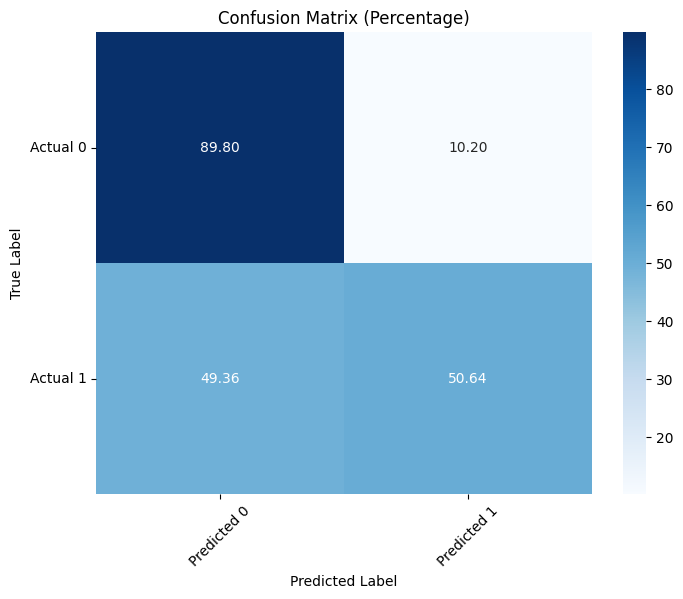

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming 'label_name' is the column for actual labels and 'prediction' for predicted labels
y_true = predict_df.select(label_name).rdd.flatMap(lambda x: x).collect()
y_pred = predict_df.select("prediction").rdd.flatMap(lambda x: x).collect()

# Calculate confusion matrix using sklearn
conf_matrix = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix to get percentages
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Create a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix_percentage,
                               index=['Actual 0', 'Actual 1'],
                               columns=['Predicted 0', 'Predicted 1'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='.2f', cmap='Blues', cbar=True)

# Adding titles and labels
plt.title('Confusion Matrix (Percentage)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Calculate precision (weighted)
evaluator = MulticlassClassificationEvaluator(labelCol=label_name, predictionCol="prediction", metricName="weightedPrecision")
precision = evaluator.evaluate(predict_df)

print(f"Weighted Precision: {precision}")

Weighted Precision: 0.7629165211319641


In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol=label_name, predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predict_df)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7707567964731815


In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml import PipelineModel
import matplotlib.pyplot as plt
from pyspark.sql import functions as F


In [ ]:
# Assuming 'label_name' is the column for actual labels and 'prediction' is the predicted column
evaluator = BinaryClassificationEvaluator(labelCol=label_name, rawPredictionCol="rawPrediction", metricName="areaUnderROC")

roc_auc = evaluator.evaluate(predict_df)
print(f"ROC AUC Score: {roc_auc}")


ROC AUC Score: 0.7857216097945641


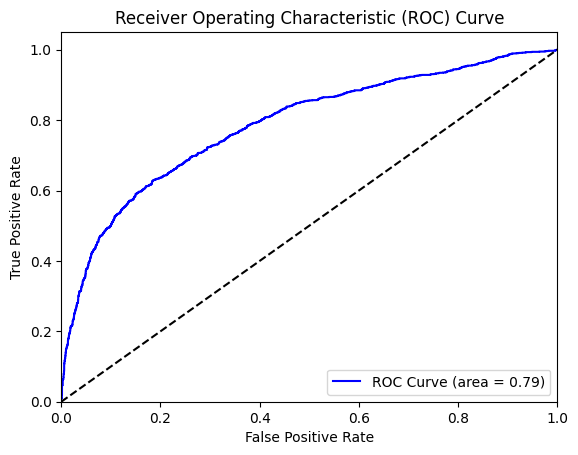

In [ ]:
# Get the probabilities of each class
probabilities = predict_df.select(label_name, "prediction", "probability").collect()

# Prepare data for ROC curve
y_true = []
y_scores = []
for row in probabilities:
    y_true.append(row[label_name])
    y_scores.append(row.probability[1])  # Assuming binary classification, index 1 for positive class

# Calculate True Positive Rate and False Positive Rate
fpr, tpr, _ = roc_curve(y_true, y_scores)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
# Optional: Generate classification report
report = classification_report(y_true, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      2756
           1       0.71      0.51      0.59      1327

    accuracy                           0.77      4083
   macro avg       0.75      0.70      0.72      4083
weighted avg       0.76      0.77      0.76      4083

